In [1]:
import os
import tarfile 
import urllib.request



In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

    
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



### Take a Quick look at the Data Structure 

In [5]:
housing = load_housing_data()

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Quick Description of the data 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# Notice the total_bedrooms have only 20,433 entries, meaning 207 missing values.
# All but one attribute is numerical.

housing['ocean_proximity'].value_counts()

# Ocean proximity is a categorical feature with 5 classes.


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

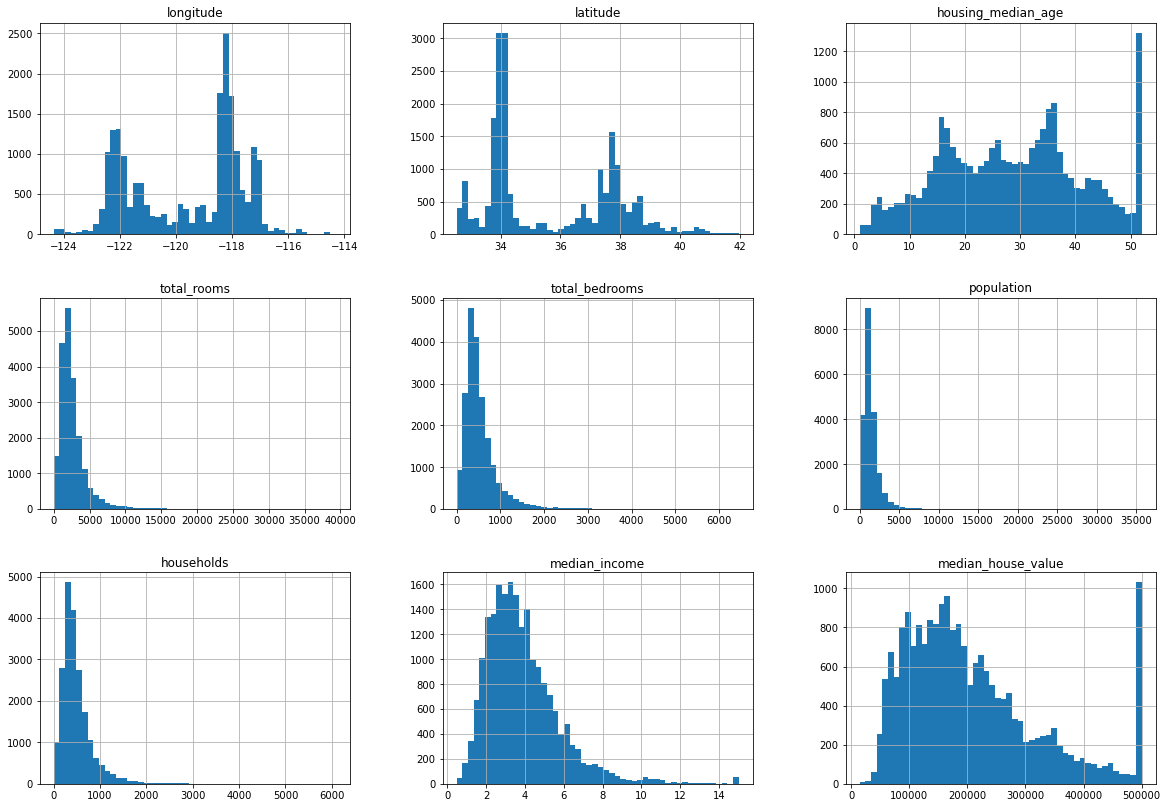

In [23]:
# An Overview of the numerical columns is another way to understand our data better.

display(housing.describe())

%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,14))

In [24]:
# Key points to note on the describution

# 1 The median income attribute does not look like it is expressed in US dollars but rather a scaled value. range (0-15)

# 2 The housing median age and the median house value were also capped. after noticing the distribution------
#  after 50 and 500000 respectivly

# 3 The discribution has a large varying range. This would be a challenge while fitting a model



<AxesSubplot:>

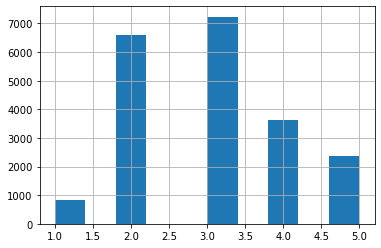

In [36]:
# Understanding that the median income is an important attribute in the prediction of the median house value 

# But after visualization, we discovered clusters around the 1.5 - 6 points on the median_income attribute which need to be addressed.

# Before splitting the data points we must ensure the test set is a good representation of the entire dataset (stratified sample).


housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

housing['income_cat'].hist()

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=20)

for train_index, test_index in split.split(housing, housing['income_cat']):
    
    split_train = housing.loc[train_index]
    split_test = housing.loc[test_index]
    

    
print(f'Distribution of income_cat on train set : \n {split_train.income_cat.value_counts()/len(split_train)}')

print()
print(f'Distribution of income_cat on test set : \n {split_test.income_cat.value_counts()/len(split_test)}')

# Avoid sampling bias by successful split the test set to a best representation of the training set. 

Distribution of income_cat on train set : 
 3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

Distribution of income_cat on test set : 
 3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [51]:
# Remove the income_cat attribute and bring the data to its original state.

for sets in (split_train, split_test):
    sets.drop(columns='income_cat', axis=1, inplace=True)

## Visualize data and Gain Insight

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

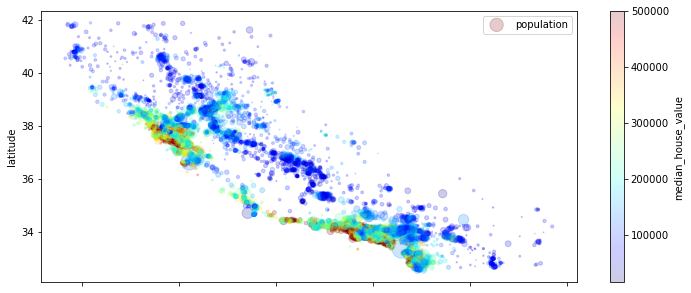

In [63]:
# Wording with training set

housing = split_train.copy()

# Using geographical data (longitude and latitude) to plot a kind of map, and use alpha to identify dense areas 

housing.plot(x='longitude', y='latitude', kind='scatter', alpha=0.2, s=housing['population']/100, label='population', figsize=(12,5), c='median_house_value', colorbar=True, cmap=plt.get_cmap('jet'))

In [67]:
# Looking for correlations

corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

# correlation identifies median_income has a high correlation with the output value. zooming in for more insight

median_house_value    1.000000
median_income         0.686376
total_rooms           0.131834
housing_median_age    0.116039
households            0.063218
total_bedrooms        0.046387
population           -0.030128
longitude            -0.047133
latitude             -0.141979
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

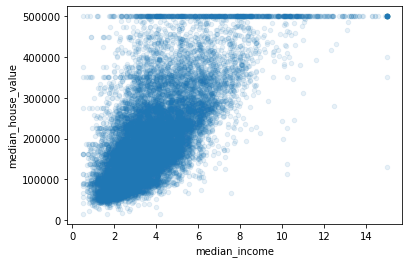

In [72]:
housing.plot(y='median_house_value', x='median_income', kind='scatter', alpha=0.1)

In [73]:
# Key points to note

# 1 This plot shows a strong correlation between median_income and median_house_value. This sounds logical
# 2 The initial noticed problem (cap) is still visible at median house value of $500000, this must be resolved 

## Feature Engineering

In [78]:
# Twick the data to generate an improved correlation on the housing dataset



housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

housing['bed_rooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

housing['population_per_household'] = housing['population']/ housing['households']

housing.corr().median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686376
rooms_per_household         0.144659
total_rooms                 0.131834
housing_median_age          0.116039
households                  0.063218
total_bedrooms              0.046387
population_per_household   -0.021894
population                 -0.030128
longitude                  -0.047133
latitude                   -0.141979
bed_rooms_per_room         -0.254494
Name: median_house_value, dtype: float64

In [80]:
# bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

# The number of rooms per household is also more informative than the total number of rooms in a district

# This insight would be useful in developing a transformer function

In [81]:
housing = split_train.drop('median_house_value', axis=1)

housing_labels = split_train['median_house_value'].copy()



## Data Cleaning 

In [84]:
# Since the missing value is relatively small compared to the available dataset. we can fill in the missing value with the median value.

median_bedroom = housing['total_bedrooms'].median()

housing['total_bedrooms'].fillna(median_bedroom, inplace=True)

# To ensure the median value of all attributes are saved incase of missing values in the test data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')


# Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity

housing_num = housing.drop('ocean_proximity', axis=1)

# Fit median values for all attributes
imputer.fit(housing_num)



SimpleImputer(strategy='median')

In [111]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  435.    , 1163.    ,
        410.    ,    3.5375])

In [115]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  435.    , 1163.    ,
        410.    ,    3.5375])

In [116]:
X = imputer.transform(housing_num)

## Handling the categorical column

In [119]:
# Identify one categorical column

housing_cat = housing[['ocean_proximity']]

housing_cat.head()

,ocean_proximity
5266,<1H OCEAN
5621,NEAR OCEAN
10241,<1H OCEAN
19767,INLAND
944,NEAR BAY


In [126]:
# so let’s convert these categories from text to numbers. 

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

housing_cat_encoder = onehot_encoder.fit_transform(housing_cat)

housing_cat_encoder

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom Transformer

In [134]:
from sklearn.base import BaseEstimator, TransformerMixin

room_xi, bedroom_xi, population_xi, household_xi = 3, 4, 5, 6

class CombinedAttributestAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_rooms=True):
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, room_xi] / X[:, household_xi]
        
        population_per_household = X[:, population_xi] / X[:, household_xi]
        
        if self.add_bedrooms_per_rooms:
            bedrooms_per_rooms = X[:, bedroom_xi] / X[:, room_xi]
            
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_rooms]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
        
attr_adder = CombinedAttributestAdder(add_bedrooms_per_rooms=False)


housing_extra_attrb = attr_adder.transform(housing.values)
    
    

## Transformer Pipelines

In [141]:
# Import Pipeline to automate data transformation process

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing_num)
cat_attribs =['ocean_proximity']


num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributestAdder()),
                         ('std_scalar', StandardScaler()),
                        ])


full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), 
                                  ('cat', OneHotEncoder(), cat_attribs)
                                  ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_prepared = full_pipeline.fit_transform(housing)


## Model Training

In [143]:
from sklearn.linear_model import LinearRegression


lin_model = LinearRegression()
lin_model.fit(housing_prepared, housing_labels)

LinearRegression()

In [146]:
# Try out the performance of our model

some_data = housing.iloc[:5]

some_label = housing_labels.iloc[:5]

some_prepared = full_pipeline.transform(some_data)

lin_model.predict(some_prepared)


array([432456.60775058, 154377.25073769, 238986.90462057,  72343.05184815,
       280832.36320179])

In [150]:
print('Median house value based on model :', *some_label)

Median house value based on model : 500001.0 152300.0 265500.0 68400.0 242200.0


In [155]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()


# Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

forest_rmse_score = np.sqrt(-scores)

# function to display metric

def display_score(scores):
    print('Score: ', scores)
    print('Mean: ', scores.mean())
    print('Std: ', scores.std())


forest_reg.fit(housing_prepared, housing_labels)



RandomForestRegressor()

In [166]:
# Check performance on the model

print('After cross validation:')
print( display_score(forest_rmse_score))


forest_reg_predict = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, forest_reg_predict)

forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)


After cross validation:
Score:  [52853.87813065 46432.32589236 51376.84340687 50062.94306066
 47592.16797622 50011.16928008 45515.4652856  53693.55844253
 48297.2658157  53420.38069566]
Mean:  49925.599798632786
Std:  2772.485127201035
None
18602.959777792767


In [170]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10,30], 'max_features':[2,4,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [ 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [171]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [173]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
        
        
# Identify the best hyperparameter option for the model


        

63046.835966792234 {'max_features': 2, 'n_estimators': 3}
55167.85562161649 {'max_features': 2, 'n_estimators': 10}
52413.322810232086 {'max_features': 2, 'n_estimators': 30}
60085.974060509376 {'max_features': 4, 'n_estimators': 3}
52208.14972327531 {'max_features': 4, 'n_estimators': 10}
50395.271446679886 {'max_features': 4, 'n_estimators': 30}
58635.72531007889 {'max_features': 8, 'n_estimators': 3}
52024.44073990909 {'max_features': 8, 'n_estimators': 10}
49977.73655174093 {'max_features': 8, 'n_estimators': 30}
60349.563435973454 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51754.745267697785 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
57944.32225695561 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51262.23516491609 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


## Analyze the Best Models and Their Errors

In [176]:
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances

# Let’s display these importance scores next to their corresponding attribute names

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3694749707546812, 'median_income'),
 (0.16129788586078087, 'INLAND'),
 (0.11377944595785124, 'pop_per_hhold'),
 (0.07100038372687346, 'longitude'),
 (0.05870563339041344, 'latitude'),
 (0.058438763095241875, 'bedrooms_per_room'),
 (0.05285563834602847, 'rooms_per_hhold'),
 (0.04252912033636801, 'housing_median_age'),
 (0.015326135111536184, 'population'),
 (0.015059607508278625, 'total_rooms'),
 (0.0144641609235222, 'total_bedrooms'),
 (0.014117646036508743, 'households'),
 (0.007019767927597079, '<1H OCEAN'),
 (0.0030284953354093674, 'NEAR OCEAN'),
 (0.002872122390201786, 'NEAR BAY'),
 (3.0223298707352556e-05, 'ISLAND')]

## Evaluate Your System on the Test Set

In [181]:
final_model = grid_search.best_estimator_

X_test = split_test.drop("median_house_value", axis=1)
y_test = split_test["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

49891.97985648702

In [182]:
import os
os.getcwd()

'C:\\Users\\BOTS'